In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from os.path import exists
import sklearn.linear_model as lm

import sys
sys.path.insert(0, "../util/")
import util as util

In [2]:
amesHousing = pd.read_csv('../data/Ames_Housing_Price_Data.csv')
amesRealEstate = pd.read_csv('../data/Ames_Real_Estate_Data.csv')

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
amesHousing.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
amesRealEstate.head()

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4599.0,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1,520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
2,520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4513.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
3,520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,3449.0,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
4,520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4506.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [5]:
set(amesHousing.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [50]:
amesHousing['MSSubClass'].dtype

dtype('int64')

In [6]:
amesHousingCategoricalData = amesHousing.select_dtypes(include=['O'])

In [7]:
amesHousingCategoricalData["Alley"].value_counts()

Grvl    105
Pave     63
Name: Alley, dtype: int64

In [8]:
for col in amesHousingCategoricalData.columns:
    print(col)
    print(set(amesHousing[col]))
    if (amesHousing[col].isnull().values.any()):
        print(amesHousing[col].value_counts())
        print(f'{amesHousing[col].isnull().sum()} nan values')

MSZoning
{'FV', 'RM', 'C (all)', 'A (agr)', 'RL', 'I (all)', 'RH'}
Street
{'Grvl', 'Pave'}
Alley
{nan, 'Grvl', 'Pave'}
Grvl    105
Pave     63
Name: Alley, dtype: int64
2412 nan values
LotShape
{'IR3', 'IR2', 'Reg', 'IR1'}
LandContour
{'Lvl', 'Low', 'HLS', 'Bnk'}
Utilities
{'AllPub', 'NoSewr'}
LotConfig
{'CulDSac', 'FR3', 'Corner', 'FR2', 'Inside'}
LandSlope
{'Mod', 'Gtl', 'Sev'}
Neighborhood
{'Timber', 'CollgCr', 'SWISU', 'Somerst', 'IDOTRR', 'Edwards', 'GrnHill', 'BrDale', 'NPkVill', 'MeadowV', 'Crawfor', 'Blueste', 'NAmes', 'Blmngtn', 'NridgHt', 'Sawyer', 'Veenker', 'OldTown', 'Greens', 'SawyerW', 'NoRidge', 'Mitchel', 'BrkSide', 'Landmrk', 'StoneBr', 'NWAmes', 'ClearCr', 'Gilbert'}
Condition1
{'PosA', 'RRAn', 'RRNn', 'RRNe', 'Artery', 'PosN', 'RRAe', 'Feedr', 'Norm'}
Condition2
{'PosA', 'RRAn', 'RRNn', 'Artery', 'PosN', 'RRAe', 'Feedr', 'Norm'}
BldgType
{'TwnhsE', 'Twnhs', '2fmCon', 'Duplex', '1Fam'}
HouseStyle
{'1.5Unf', 'SLvl', '2Story', '1.5Fin', '2.5Fin', 'SFoyer', '2.5Unf', '1

In [9]:
for col in amesHousingCategoricalData.columns:
    if (amesHousing[col].isnull().values.any()):
        print(amesHousing[amesHousing[col]=='nan'].shape[0])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [10]:
for col in amesHousingCategoricalData.columns:
    amesHousing[col]=amesHousing[col].fillna('nan')

In [11]:
for col in amesHousingCategoricalData.columns:
    if (amesHousing[col].isnull().values.any()):
        print(amesHousing[amesHousing[col]=='nan'].shape[0])

In [12]:
pd.get_dummies(amesHousing['Utilities'],prefix='Utilites',drop_first=True)

,Utilites_NoSewr
0,0
1,0
2,0
3,0
4,0
...,...
2575,0
2576,0
2577,0
2578,0


In [41]:
a = {1:1,2:2,3:3}

In [47]:
5 in a.keys()

False

In [13]:
relatedDummiesDictionary = {}
for col in amesHousingCategoricalData.columns:
    dummyData = pd.get_dummies(amesHousing[col],prefix=col,drop_first=True)
    for dummyCol in dummyData.columns:
        relatedDummiesDictionary[dummyCol] = dummyData.columns
    amesHousing = pd.concat([amesHousing,dummyData],axis=1)

In [36]:
set(amesHousing.dtypes)

{dtype('uint8'), dtype('int64'), dtype('float64'), dtype('O')}

In [14]:
amesHousingNumericalData = amesHousing.select_dtypes(include=['uint8','int64','float64'])
[col for col in amesHousingNumericalData.columns if amesHousingNumericalData[col].isnull().values.any()]

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [15]:
testList = [1,2,3,10000]
print(np.std(np.array(testList)))
print(np.mean(np.array(testList)))
util.markOutliers(testList)

4329.261051264984
2501.5


array([False, False, False, False])

In [16]:
print(f'{amesHousingNumericalData.shape[0]} rows before removing outliers')
amesHousingNumericalData = util.removeOutliers(amesHousingNumericalData.fillna(0.0))
print(f'{amesHousingNumericalData.shape[0]} rows after removing outliers')

2580 rows before removing outliers
1681 rows after removing outliers


In [17]:
corr = amesHousingNumericalData.corr()
corr

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Unnamed: 0,1.000000,0.000314,-0.002984,-0.016564,0.010216,-0.030640,-0.021075,-0.005139,0.028239,-0.003536,...,-0.016094,-0.002529,-0.004399,-0.022456,NaN,0.000349,NaN,0.004134,0.025446,-0.037828
PID,0.000314,1.000000,-0.103268,-0.197050,-0.114702,0.006779,0.035674,-0.217582,0.133488,-0.300407,...,-0.154874,-0.031711,-0.113410,0.170765,NaN,0.005049,NaN,-0.002343,-0.055568,-0.008722
GrLivArea,-0.002984,-0.103268,1.000000,0.745927,0.078674,0.118867,0.333734,0.570003,-0.212931,0.336974,...,0.449072,0.217869,0.357699,-0.087931,NaN,0.020184,NaN,-0.006307,0.018269,-0.026467
SalePrice,-0.016564,-0.197050,0.745927,1.000000,0.003550,0.165135,0.335360,0.796862,-0.240838,0.622388,...,0.648260,0.324773,0.402408,-0.198059,NaN,0.007111,NaN,-0.031881,0.018384,-0.000996
MSSubClass,0.010216,-0.114702,0.078674,0.003550,1.000000,-0.316815,-0.522461,0.191892,-0.129302,0.211255,...,-0.044827,0.011661,0.033473,-0.087171,NaN,-0.038251,NaN,-0.036692,0.012129,-0.019841
LotFrontage,-0.030640,0.006779,0.118867,0.165135,-0.316815,1.000000,0.253485,0.063799,0.040130,-0.020291,...,0.158614,0.004339,0.046524,0.048828,NaN,0.061853,NaN,-0.012334,-0.012068,0.018501
LotArea,-0.021075,0.035674,0.333734,0.335360,-0.522461,0.253485,1.000000,0.071197,-0.058950,0.050395,...,0.276573,0.121297,0.097918,-0.015232,NaN,0.059728,NaN,0.084517,-0.017328,0.010121
OverallQual,-0.005139,-0.217582,0.570003,0.796862,0.191892,0.063799,0.071197,1.000000,-0.255800,0.623182,...,0.520162,0.255668,0.364467,-0.181521,NaN,-0.039079,NaN,-0.035280,0.004617,0.012353
OverallCond,0.028239,0.133488,-0.212931,-0.240838,-0.129302,0.040130,-0.058950,-0.255800,1.000000,-0.500527,...,-0.264714,-0.073139,-0.191320,0.187570,NaN,0.068207,NaN,0.089378,0.017299,0.009289
YearBuilt,-0.003536,-0.300407,0.336974,0.622388,0.211255,-0.020291,0.050395,0.623182,-0.500527,1.000000,...,0.511961,0.264936,0.318713,-0.418895,NaN,-0.099918,NaN,-0.055597,-0.018449,0.028602


<AxesSubplot:>

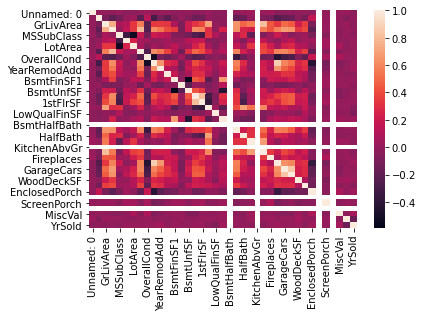

In [18]:
sns.heatmap(corr)

In [19]:
correlationList = []
pairList = []
pValList = []
for i in range(len(amesHousingNumericalData.columns)):
    for j in range(len(amesHousingNumericalData.columns)):
        if i<j:
            iColumn = amesHousingNumericalData.columns[i]
            jColumn = amesHousingNumericalData.columns[j]
            pairList.append(iColumn+'-'+jColumn)
            corrVal,pVal = stats.spearmanr(amesHousingNumericalData[iColumn],
                                          amesHousingNumericalData[jColumn])
            correlationList.append(corrVal)
            pValList.append(pVal)

amesHousingCorreltaion = pd.DataFrame({"pair":pairList,
                                "corr":correlationList,
                                "pVal":pValList
                               },columns=["pair","corr","pVal"]).sort_values(by=["pVal","corr"],
                                                                             ascending=[True,False])
            
            

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [20]:
amesHousingSigCorrs = amesHousingCorreltaion[(np.isnan(amesHousingCorreltaion['pVal'])==False) & (amesHousingCorreltaion['pVal'] < 0.05)]

In [39]:
absRValues = abs(amesHousingSigCorrs['corr'])

In [40]:
print(amesHousingSigCorrs.size[0])
amesHousingSigCorrs = amesHousingSigCorrs[abs(amesHousingSigCorrs['corr']) > absRValues.quantile()]
print(amesHousingSigCorrs.size[0])

pandas.core.series.Series

array([[<AxesSubplot:title={'center':'corr'}>,
        <AxesSubplot:title={'center':'pVal'}>]], dtype=object)

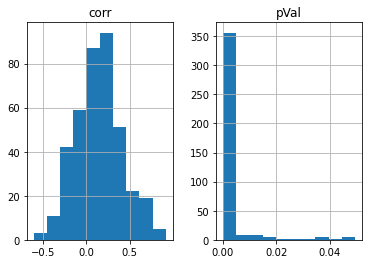

In [21]:
amesHousingSigCorrs.hist(bins=10)

In [27]:
amesHousingSigCorrs.head()

,pair,corr,pVal
323,YearBuilt-GarageYrBlt,0.921888,0.0
465,TotalBsmtSF-1stFlrSF,0.855253,0.0
686,GarageCars-GarageArea,0.821199,0.0
97,GrLivArea-TotRmsAbvGrd,0.804557,0.0
114,SalePrice-OverallQual,0.792624,0.0


In [32]:
amesHousingSigCorrs['pair'].str.contains('YearBuilt')

323     True
465    False
686    False
97     False
114    False
       ...  
448    False
537    False
485    False
539    False
220    False
Name: pair, Length: 393, dtype: bool

In [48]:
[1,2,3]+[]

[1, 2, 3]

In [34]:
sigCorrDictionary = {}
for col in amesHousingNumericalData.columns:
    correlatedRelations = (amesHousingSigCorrs[amesHousingSigCorrs['pair'].str.contains(col)])["pair"]
    correlatedColumns = [name.replace("-","").replace(col,"") for name in correlatedRelations]
    relatedDummies = []
    for corrCol in correlatedColumns:
        if corrCol in relatedDummiesDictionary.keys():
            relatedDummies = relatedDummies + relatedDummiesDictionary[corrCol]
    correlatedColumns = list(set(correlatedColumns + relatedDummies))
    sigCorrDictionary[col] = correlatedColumns

In [35]:
sigCorrDictionary

{'Unnamed: 0': [],
 'PID': ['YearBuilt',
  'OverallQual',
  'FullBath',
  'GarageYrBlt',
  'GarageCars',
  'SalePrice',
  'MasVnrArea',
  'HalfBath',
  'YearRemodAdd',
  'OpenPorchSF',
  'EnclosedPorch',
  'GrLivArea',
  'GarageArea',
  'Fireplaces',
  'TotalBsmtSF',
  'OverallCond',
  'TotRmsAbvGrd',
  'MSSubClass',
  'BsmtUnfSF',
  '1stFlrSF',
  'WoodDeckSF',
  '2ndFlrSF',
  'MoSold'],
 'GrLivArea': ['TotRmsAbvGrd',
  'SalePrice',
  'FullBath',
  '2ndFlrSF',
  'OverallQual',
  'BedroomAbvGr',
  'GarageCars',
  'HalfBath',
  'Fireplaces',
  'OpenPorchSF',
  'GarageArea',
  '1stFlrSF',
  'YearBuilt',
  'LotArea',
  'GarageYrBlt',
  'YearRemodAdd',
  'TotalBsmtSF',
  'MasVnrArea',
  'OverallCond',
  'BsmtUnfSF',
  'MSSubClass',
  'WoodDeckSF',
  'LotFrontage',
  'PID',
  'EnclosedPorch',
  'BsmtFinSF2'],
 'SalePrice': ['OverallQual',
  'GrLivArea',
  'FullBath',
  'YearBuilt',
  'GarageCars',
  'GarageYrBlt',
  'GarageArea',
  'YearRemodAdd',
  'TotRmsAbvGrd',
  'TotalBsmtSF',
  '1stFlr

In [26]:
powers = np.linspace(1,10,10)
X = (np.random.random(1000)*1000).reshape(-1, 1)
for power in powers:
    y = X ** power
    linmodel = lm.LinearRegression()
    linmodel.fit(np.log(X),np.log(y))
    print(f'power = {power} and slope is {linmodel.coef_[0,0]}')
    
    

power = 1.0 and slope is 0.9999999999999999
power = 2.0 and slope is 1.9999999999999998
power = 3.0 and slope is 2.999999999999999
power = 4.0 and slope is 3.9999999999999996
power = 5.0 and slope is 5.0
power = 6.0 and slope is 5.999999999999998
power = 7.0 and slope is 6.999999999999993
power = 8.0 and slope is 7.999999999999999
power = 9.0 and slope is 8.999999999999993
power = 10.0 and slope is 10.0
